In [44]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

**Power law**

$$
v(h) = v_{\text{ref}} \cdot \left( \frac{h}{h_{\text{ref}}} \right)^{\alpha}
$$


v(h) — wind speed at height h,

v_ref — wind speed at a known height (eg 10 m),

α — empirical coefficient (usually 0.14–0.2 depending on the landscape).

In [ ]:
# getting weather data from open-meteo.com
# documentation: https://open-meteo.com/en/docs

latitude = 43.1997141
longitude = 76.7972177

altitudes = np.logspace(np.log10(0.1), np.log10(306.21), num=50)  # based on grid created in Airflow Analyst
alpha = 0.15 
reference_height = 10  # meters

response = requests.get(
    "https://api.open-meteo.com/v1/forecast",
    params={
        "latitude": latitude,
        "longitude": longitude,
        "current_weather": True,
        "windspeed_unit": "ms",
    }
)

print(json.dumps(response.json(), indent=4))

{
    "latitude": 43.25,
    "longitude": 76.75,
    "generationtime_ms": 0.035881996154785156,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 836.0,
    "current_weather_units": {
        "time": "iso8601",
        "interval": "seconds",
        "temperature": "\u00b0C",
        "windspeed": "m/s",
        "winddirection": "\u00b0",
        "is_day": "",
        "weathercode": "wmo code"
    },
    "current_weather": {
        "time": "2025-06-03T07:30",
        "interval": 900,
        "temperature": 28.0,
        "windspeed": 2.95,
        "winddirection": 66,
        "is_day": 1,
        "weathercode": 3
    }
}


In [46]:
# wind profile calculation

wind_10m = response.json()['current_weather']['windspeed']

data = []
for h in altitudes:
    wind_speed = wind_10m * (h / reference_height) ** alpha if h > 0 else 0
    data.append({
        "Ground Height (m)": round(h, 2),
        "Wind Speed (m/s)": round(wind_speed, 3),
        "Direction": 0  
    })

df = pd.DataFrame(data)
df

,Ground Height (m),Wind Speed (m/s),Direction
0,0.10,1.479,0
1,0.12,1.515,0
2,0.14,1.553,0
3,0.16,1.592,0
4,0.19,1.631,0
5,0.23,1.672,0
6,0.27,1.713,0
7,0.31,1.756,0
8,0.37,1.800,0
9,0.44,1.844,0


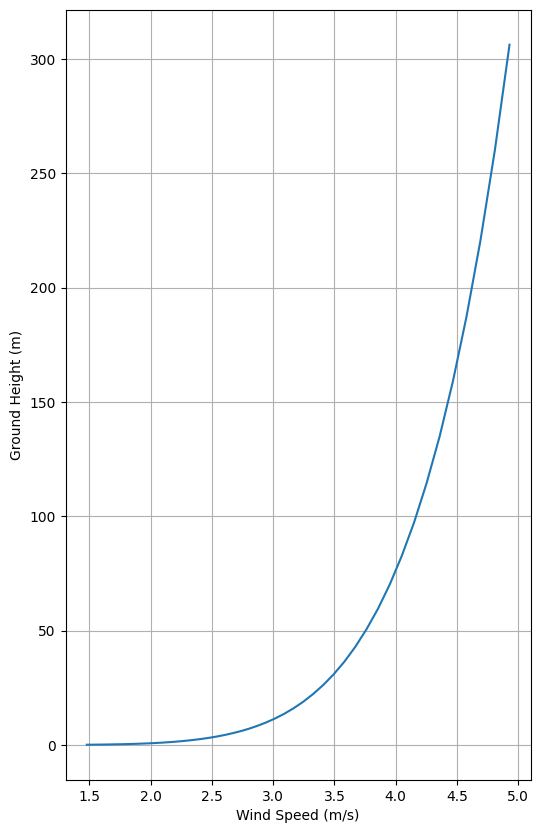

In [47]:
plt.figure(figsize=(6,10))
plt.plot(df['Wind Speed (m/s)'], df['Ground Height (m)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Ground Height (m)')
plt.grid(True)
plt.show()


In [ ]:
df.to_csv("windProfile.csv", index_label="K")